In [30]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
import pandas as pd

## Introduction:

Portfolio optimization is a crucial strategy in financial management and investment planning that aims to maximize returns while minimizing risk for an investment portfolio. This technique relies on the careful selection and combination of various assets to achieve the desired balance between risk and return, based on the investor's risk tolerance, investment horizon, and financial goals. The rationale behind portfolio optimization is grounded in the fundamental principle of diversification, which suggests that holding a mix of assets can reduce the overall risk of the portfolio, as the performance of individual assets can vary independently.

Investors use portfolio optimization to systematically identify the most efficient or optimal allocation of assets within their portfolio. This involves determining the proportion of each asset in the portfolio that yields the highest expected return for a given level of risk or, conversely, the lowest risk for a given level of expected return. The process incorporates various mathematical and statistical models to analyze the potential combinations of assets, taking into account factors such as historical returns, volatility, correlation between assets, and market conditions.

The significance of portfolio optimization extends beyond individual investors to include fund managers, financial advisors, and institutional investors, who all seek to enhance portfolio performance and align investments with strategic objectives. By applying optimization techniques, investors can make more informed decisions, better manage their investment risks, and increase the likelihood of achieving their financial targets.

In the forthcoming project, we will demonstrate the application of portfolio optimization techniques to a selected set of investments. Through this practical illustration, we aim to showcase how portfolio optimization can be effectively utilized to construct a portfolio that optimally balances the trade-off between risk and return, according to predefined investment criteria and goals. This demonstration will provide insights into the practical aspects of portfolio optimization and its impact on investment decision-making.

In [76]:
# tickers = ['SPY','BND','GLD','QQQ','VTI']
tickers = ['SPY','BND','GLD','QQQ']

In [6]:
# End Date
end_date = datetime.today()

In [7]:
#Start Date
start_date = end_date - timedelta(10*365)

In [8]:
print (start_date)

2014-02-09 00:42:29.236468


In [9]:
spy = yf.download("SPY", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [10]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10,179.699997,180.070007,179.210007,180.009995,150.240417,92218800
2014-02-11,180.160004,182.440002,180.039993,181.979996,151.884613,117814100
2014-02-12,182.250000,182.830002,181.710007,182.070007,151.959732,94717700
2014-02-13,180.839996,183.199997,180.830002,183.009995,152.744247,100542200
2014-02-14,182.839996,184.360001,182.669998,184.020004,153.587265,96498400


In [11]:
bnd = yf.download("BND", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [13]:
bnd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10,81.150002,81.209999,81.110001,81.199997,62.141140,1302200
2014-02-11,81.029999,81.070000,80.970001,81.029999,62.011036,5401900
2014-02-12,80.949997,80.949997,80.800003,80.889999,61.903862,3057200
2014-02-13,81.019997,81.099998,81.010002,81.089996,62.056961,3466300
2014-02-14,81.110001,81.120003,81.040001,81.059998,62.034000,4205900


In [14]:
gld = yf.download("GLD", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [15]:
gld.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10,122.800003,123.160004,122.720001,122.919998,122.919998,7931200
2014-02-11,123.379997,124.750000,123.360001,124.360001,124.360001,11546000
2014-02-12,124.400002,124.980003,124.129997,124.430000,124.430000,6651900
2014-02-13,124.699997,125.599998,124.660004,125.489998,125.489998,9167900
2014-02-14,126.989998,127.379997,126.750000,127.150002,127.150002,11147900


In [16]:
qqq = yf.download("QQQ", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [17]:
qqq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10,87.269997,87.839996,87.209999,87.800003,80.503334,30205400
2014-02-11,87.989998,88.970001,87.889999,88.800003,81.420212,38635500
2014-02-12,88.980003,89.169998,88.699997,88.970001,81.576111,32507200
2014-02-13,88.320000,89.699997,88.300003,89.629997,82.181252,40454500
2014-02-14,89.599998,90.010002,89.330002,89.809998,82.346291,33212400


In [53]:
vti = yf.download("VTI", start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [54]:
for stock_df in (spy, bnd, gld, qqq, vti):
	stock_df['Normed Return'] = stock_df['Adj Close'] /stock_df.iloc[0]['Adj Close']

In [55]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Value
Date,,,,,,,,,
2014-02-10,179.699997,180.070007,179.210007,180.009995,150.240417,92218800,1.000000,0.200000,200000.000000
2014-02-11,180.160004,182.440002,180.039993,181.979996,151.884613,117814100,1.010944,0.202189,202188.752646
2014-02-12,182.250000,182.830002,181.710007,182.070007,151.959732,94717700,1.011444,0.202289,202288.751062
2014-02-13,180.839996,183.199997,180.830002,183.009995,152.744247,100542200,1.016665,0.203333,203333.097708
2014-02-14,182.839996,184.360001,182.669998,184.020004,153.587265,96498400,1.022277,0.204455,204455.322463


In [56]:
bnd.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Value
Date,,,,,,,,,
2014-02-10,81.150002,81.209999,81.110001,81.199997,62.141140,1302200,1.000000,0.400000,400000.000000
2014-02-11,81.029999,81.070000,80.970001,81.029999,62.011036,5401900,0.997906,0.399163,399162.525406
2014-02-12,80.949997,80.949997,80.800003,80.889999,61.903862,3057200,0.996182,0.398473,398472.651228
2014-02-13,81.019997,81.099998,81.010002,81.089996,62.056961,3466300,0.998645,0.399458,399458.143674
2014-02-14,81.110001,81.120003,81.040001,81.059998,62.034000,4205900,0.998276,0.399310,399310.346817


In [57]:
gld.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Value
Date,,,,,,,,,
2014-02-10,122.800003,123.160004,122.720001,122.919998,122.919998,7931200,1.000000,0.300000,300000.000000
2014-02-11,123.379997,124.750000,123.360001,124.360001,124.360001,11546000,1.011715,0.303514,303514.486974
2014-02-12,124.400002,124.980003,124.129997,124.430000,124.430000,6651900,1.012284,0.303685,303685.329056
2014-02-13,124.699997,125.599998,124.660004,125.489998,125.489998,9167900,1.020908,0.306272,306272.371623
2014-02-14,126.989998,127.379997,126.750000,127.150002,127.150002,11147900,1.034413,0.310324,310323.796176


In [58]:
qqq.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Value
Date,,,,,,,,,
2014-02-10,87.269997,87.839996,87.209999,87.800003,80.503334,30205400,1.000000,0.100000,100000.000000
2014-02-11,87.989998,88.970001,87.889999,88.800003,81.420212,38635500,1.011389,0.101139,101138.931396
2014-02-12,88.980003,89.169998,88.699997,88.970001,81.576111,32507200,1.013326,0.101333,101332.586789
2014-02-13,88.320000,89.699997,88.300003,89.629997,82.181252,40454500,1.020843,0.102084,102084.283217
2014-02-14,89.599998,90.010002,89.330002,89.809998,82.346291,33212400,1.022893,0.102289,102289.292195


## Portfolio Allocation:

Now, let's proceed to execute a straightforward portfolio allocation. Specifically, we'll take long positions with the following allocations:

1. 20% in SPY
2. 40% in BND
3. 30% in GLD
4. 10% in QQQ

For this purpose, we will employ a for loop to:

1. Combine the earlier tuple containing stock dataframes.
2. Input a list reflecting the allocation percentages.
3. Utilize tuple unpacking to establish an 'Allocation' column within our stock dataframe, which will represent the Normalized Return multiplied by the respective allocation.

In [59]:
for stock_df, allo in zip((spy, bnd, gld, qqq),[.2,.4,.3,.1]):
  stock_df['Allocation'] = stock_df['Normed Return']*allo

In [60]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Value
Date,,,,,,,,,
2014-02-10,179.699997,180.070007,179.210007,180.009995,150.240417,92218800,1.000000,0.200000,200000.000000
2014-02-11,180.160004,182.440002,180.039993,181.979996,151.884613,117814100,1.010944,0.202189,202188.752646
2014-02-12,182.250000,182.830002,181.710007,182.070007,151.959732,94717700,1.011444,0.202289,202288.751062
2014-02-13,180.839996,183.199997,180.830002,183.009995,152.744247,100542200,1.016665,0.203333,203333.097708
2014-02-14,182.839996,184.360001,182.669998,184.020004,153.587265,96498400,1.022277,0.204455,204455.322463


Let's look at the value of our position in each stock, assuming we had an initial portfolio value of $1 million.

In [61]:
# value of each position
for stock_df in (spy, bnd, gld, qqq):
	stock_df['Position Value'] = stock_df['Allocation']*1000000

In [62]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Value
Date,,,,,,,,,
2014-02-10,179.699997,180.070007,179.210007,180.009995,150.240417,92218800,1.000000,0.200000,200000.000000
2014-02-11,180.160004,182.440002,180.039993,181.979996,151.884613,117814100,1.010944,0.202189,202188.752646
2014-02-12,182.250000,182.830002,181.710007,182.070007,151.959732,94717700,1.011444,0.202289,202288.751062
2014-02-13,180.839996,183.199997,180.830002,183.009995,152.744247,100542200,1.016665,0.203333,203333.097708
2014-02-14,182.839996,184.360001,182.669998,184.020004,153.587265,96498400,1.022277,0.204455,204455.322463


Now, let's construct a DataFrame for our portfolio that encompasses the position values of all our selected stocks.

To achieve this, we will:

1. Generate a list encompassing the position values for each stock.
2. Merge these lists into a single DataFrame, ensuring to align them along axis=1.
3. Assign names to the columns accordingly.
4. Incorporate a column that represents the total value of the portfolio.

In [63]:
# create list of all position values
all_pos_vals = [spy['Position Value'], bnd['Position Value'], gld['Position Value'], qqq['Position Value']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['SPY', 'BND', 'GLD', 'QQQ']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)

Now, we have the ability to observe the daily fluctuations in our positions and the overall value of our portfolio.

Next, let's graph our portfolio. This visualization will illustrate the annual performance of our portfolio:

<Axes: xlabel='Date'>

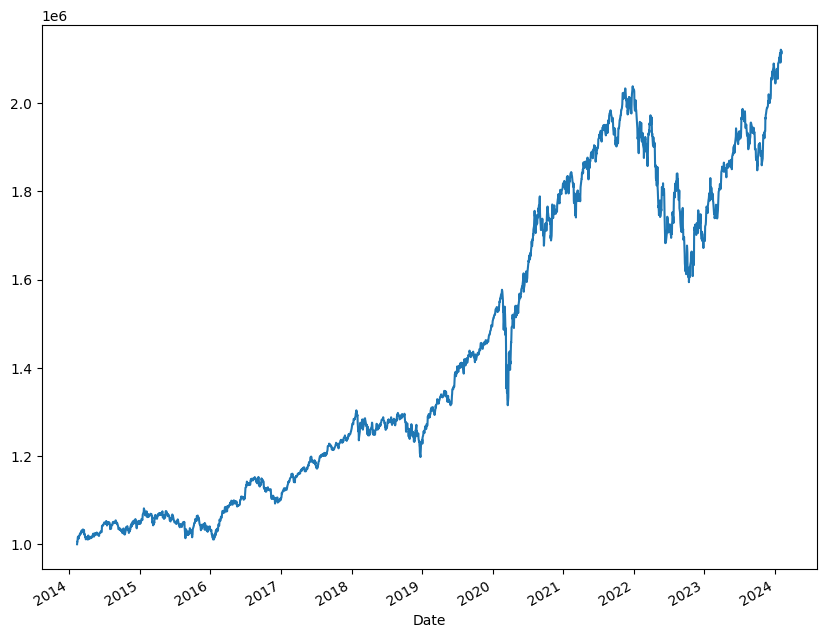

In [64]:
# plot our portfolio
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total'].plot(figsize=(10,8))

<Axes: xlabel='Date'>

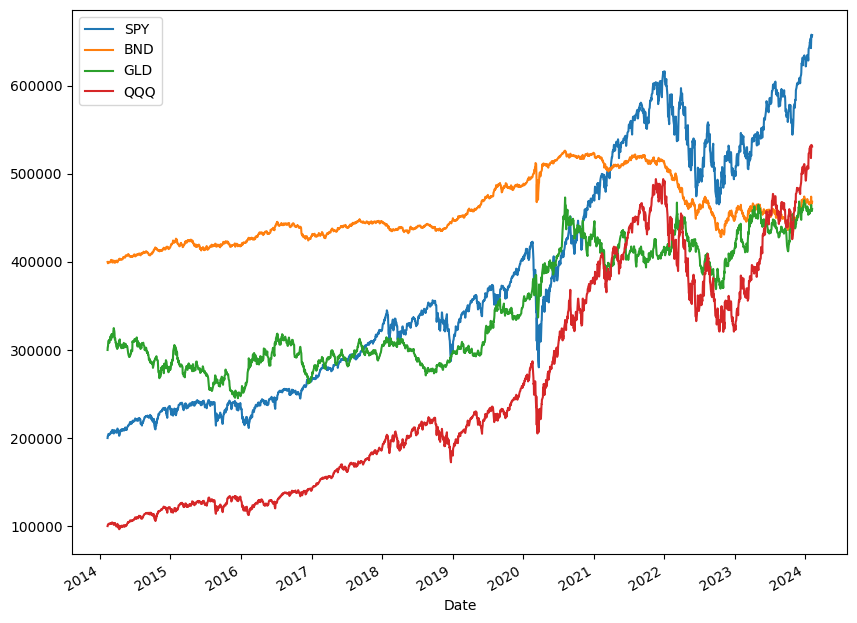

In [65]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

## Portfolio Statistics:

Let's now look at a few statistics of our portfolio, in particular:

1. Daily returns
2. Average daily return
3. Standard deviation

We're then going to use these statistics to calculate our portfolio's Sharpe ratio.

First, let's calculate our daily return:

In [66]:
# Daily Return
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)


In [67]:
# average daily return
portfolio_val['Daily Return'].mean()


0.0003165491667443901

In [68]:
# standard deviation
portfolio_val['Daily Return'].std()

0.0060149340363845815

<Axes: ylabel='Frequency'>

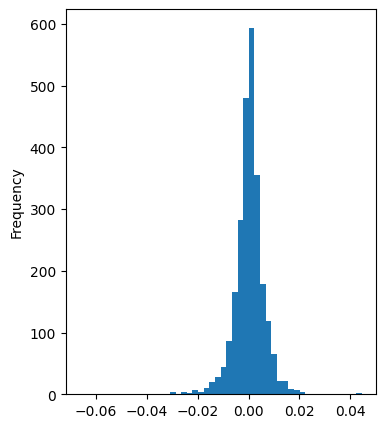

In [69]:
# plot histogram of daily returns
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [70]:
# cumulative portfolio return
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)

## Sharpe Ratio:

As previously mentioned, the Sharpe Ratio serves as an indicator of returns adjusted for risk.

It calculates the average excess return (portfolio return minus the risk-free rate) per unit of volatility or standard deviation.

For the sake of simplicity, we will assume a risk-free rate of 0%.

In [71]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [72]:
sharpe_ratio

0.05262720502495477

In [73]:
ASR = (252**0.5) * sharpe_ratio

In [74]:
ASR

0.8354309801546346

What constitutes a favorable Sharpe Ratio?

Typically, investors regard a Sharpe Ratio greater than 1 as satisfactory (this varies with risk tolerance), a ratio of 2 as quite favorable, and a ratio exceeding 3 as outstanding.

Next, we'll explore how to employ the Sharpe Ratio for more efficient portfolio allocation.

## Portfolio Optimization:

How do we enhance the allocation within our portfolio?

One approach is to explore numerous random allocations to identify the one with the highest Sharpe Ratio.

This method of trial and error through random guesses is termed a Monte Carlo Simulation.

Our strategy involves assigning random weights to each stock in our portfolio, followed by the computation of the average daily return and the standard deviation of these returns.

This calculation enables us to assess the Sharpe Ratio across a broad range of random allocations.

Next, we'll represent these allocations on a graph, plotting return against volatility and using color to indicate the Sharpe Ratio.

Our goal is to pinpoint the random allocation that yields the optimal Sharpe Ratio.

It's important to recognize that this method of random sampling is not the most efficient route to portfolio optimization. A more precise approach involves employing mathematical strategies to ascertain the portfolio's optimum Sharpe Ratio.

This technique is referred to as an optimization algorithm.

To grasp optimization algorithms, we must first understand the principle of minimization.

Minimization, akin to optimization, involves determining the value of  x that minimizes y in a simple equation like y=x^2 ; in this case, the answer is 0.
This concept of finding a minimizer aids in constructing an optimizer.

For our purposes, we aim to identify a portfolio that maximizes the Sharpe Ratio, meaning we seek an optimizer designed to minimize the negative Sharpe Ratio.

Specifically, we'll employ the optimization algorithms provided by SciPy to find the ideal weights for our portfolio allocation, optimizing for the Sharpe Ratio.

Now, let's proceed to code the portfolio optimization, starting with a Monte Carlo simulation before moving on to an optimization algorithm.

We begin by importing all our stock data from Quandl once more, then merging them and updating the column names:


In [75]:
adj_close_df = pd.DataFrame()

In [77]:
for ticker in tickers:
  data = yf.download(ticker, start = start_date, end = end_date)
  adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [78]:
adj_close_df.head()

,SPY,BND,GLD,QQQ
Date,,,,
2014-02-10,150.240387,62.141102,122.919998,80.503357
2014-02-11,151.884583,62.010975,124.360001,81.420235
2014-02-12,151.959702,61.903904,124.430000,81.576118
2014-02-13,152.744232,62.056908,125.489998,82.181244
2014-02-14,153.587204,62.034000,127.150002,82.346306


## Portfolio Optimization: Monte Carlo Simulation:
To conduct our Monte Carlo simulation with thousands of potential allocations, we will employ several statistical measures, including the average daily return:

In [79]:
# arithmetic mean daily return
adj_close_df.pct_change(1).mean()

SPY    0.000535
BND    0.000068
GLD    0.000209
QQQ    0.000756
dtype: float64

Throughout the remainder of this article, we will transition to utilizing logarithmic returns rather than arithmetic returns for calculating daily returns.

In [80]:
# arithmetic daily return
adj_close_df.pct_change(1).head()

,SPY,BND,GLD,QQQ
Date,,,,
2014-02-10,NaN,NaN,NaN,NaN
2014-02-11,0.010944,-0.002094,0.011715,0.011389
2014-02-12,0.000495,-0.001727,0.000563,0.001915
2014-02-13,0.005163,0.002472,0.008519,0.007418
2014-02-14,0.005519,-0.000369,0.013228,0.002009


Let's look at how we'd get the logarithmic mean daily return:

In [81]:
# log daily return
log_return = np.log(adj_close_df/adj_close_df.shift(1))

In [82]:
log_return.head()

,SPY,BND,GLD,QQQ
Date,,,,
2014-02-10,NaN,NaN,NaN,NaN
2014-02-11,0.010884,-0.002096,0.011647,0.011325
2014-02-12,0.000494,-0.001728,0.000563,0.001913
2014-02-13,0.005149,0.002469,0.008483,0.007391
2014-02-14,0.005504,-0.000369,0.013141,0.002006



From this comparison, it's evident that arithmetic and logarithmic returns are similar, yet logarithmic returns offer greater convenience for certain analytical methods.

Prior to executing numerous random allocations, let's perform a singular random allocation. For this process, we will:

1. Initialize our weights with a random NumPy array.
2. Adjust the weights to ensure their sum equals one.
3. Compute the anticipated return of the portfolio.
4. Determine the expected volatility of the portfolio.
5. Calculate the Sharpe Ratio.

In [83]:
print(adj_close_df.columns)

weights = np.array(np.random.random(4))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['SPY', 'BND', 'GLD', 'QQQ'], dtype='object')
Random Weights:
[0.04255242 0.52995776 0.93994194 0.15932297]
Rebalance
[0.02545343 0.31700303 0.56224186 0.09530168]
Expected Portfolio Return
0.04811364151073334
Expected Volatility
0.09117001921343565
Sharpe Ratio
0.5277353446432408


Next, we'll take the previously described procedure and execute it multiple times, reaching into the thousands.

For this purpose, we will:

1. Eliminate any print statements for clarity.
2. Specify the number of portfolios to simulate, which in this scenario is **num_ports = 5000**.
3. Initialize an array **all_weights** to store all the portfolio weights for future reference.
4. Set up an array **ret_arr** to keep track of all the portfolio returns.
5. Create an array **vol_arr** for storing the volatility metrics of each portfolio.
6. Establish an array **sharpe_arr** to record the Sharpe Ratios we compute.
7. Encapsulate the remaining code within a **for** loop to automate the simulation process.

In [84]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(adj_close_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    # weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)

    # save the weights
    all_weights[ind,:] = weights

    # expected return
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

Let's now plot out the data—we're going to use Matplotlib's scatter functionality and pass in the volatility array, the return array, and color it by the Sharpe Ratio:

Text(0, 0.5, 'Return')

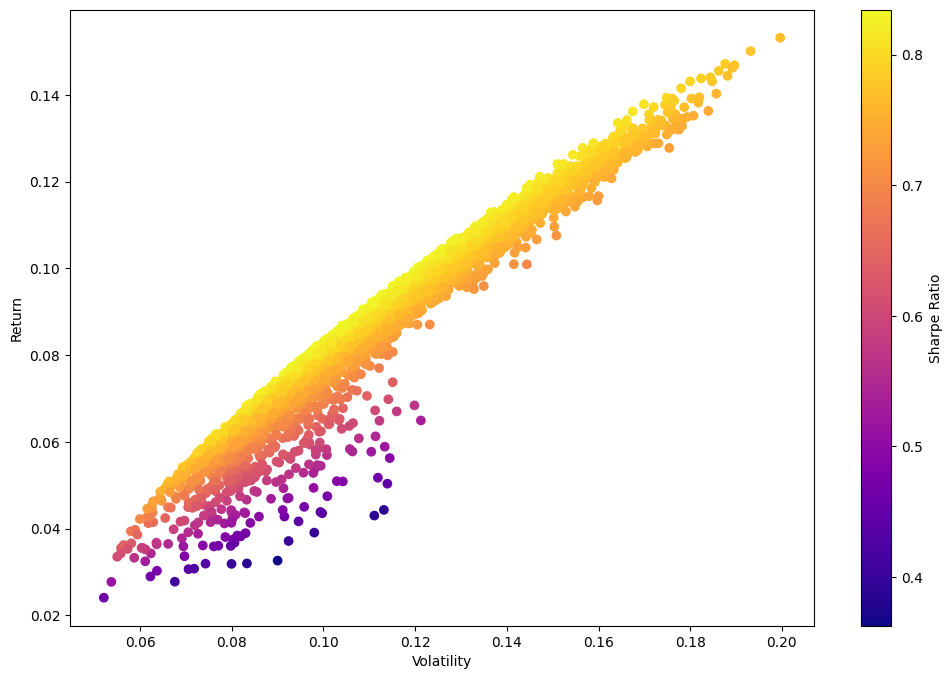

In [85]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [90]:
sharpe_arr.max()

0.8343403162033484

In [91]:
sharpe_arr.argmax()

4250

In [94]:
all_weights[4250:]

array([[0.00201588, 0.35390573, 0.21566982, 0.42840856],
       [0.30198261, 0.34043753, 0.06388634, 0.29369352],
       [0.39464487, 0.27468752, 0.231489  , 0.09917861],
       ...,
       [0.22038988, 0.39029719, 0.03615919, 0.35315374],
       [0.12575805, 0.41698496, 0.40998171, 0.04727529],
       [0.33922035, 0.1185759 , 0.15684258, 0.38536116]])

In [92]:
max_sr_ret = ret_arr[4250]
max_sr_vol = vol_arr[4250]

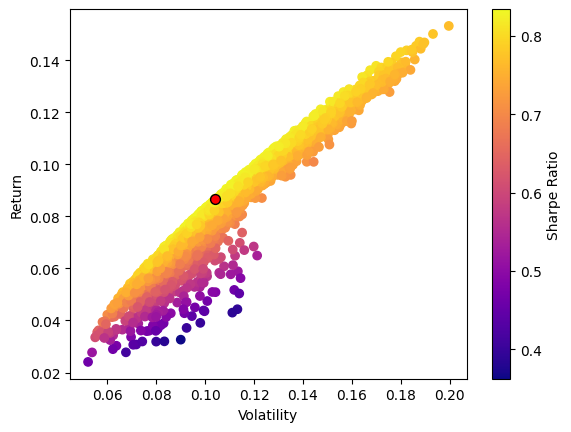

In [93]:
# plot the dataplt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

In [103]:
log_ret = np.log(adj_close_df/adj_close_df.shift(1))

## Portfolio Optimization: Optimization Algorithm:

Now, we will transition from employing random allocations to utilizing a mathematical optimization algorithm.

The bulk of this optimization process will be facilitated by SciPy, requiring us to undertake a few preparatory steps for setting up the optimization function.

We'll begin with a straightforward function that accepts weights as input and outputs an array comprising returns, volatility, and the Sharpe Ratio.

1. We'll name this function **get_ret_vol_sr** and it will take weights as its parameter.
2. It's important to ensure the weights are formatted as a NumPy array.
3. The function will then compute the portfolio's return, volatility, and Sharpe Ratio.
4. Finally, it will return an array containing the return, volatility, and Sharpe Ratio values.

In [104]:
def get_ret_vol_sr(weights):
  weights = np.array(weights)
  ret = np.sum(log_ret.mean() * weights) * 252
  vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
  sr = ret/vol
  return np.array([ret,vol,sr])

In [105]:
from scipy.optimize import minimize


To employ this function effectively, we need to develop several auxiliary functions.

Initially, we will introduce **neg_sharpe**, a function designed to accept weights as input and extract the Sharpe Ratio, which is the second element returned by our **get_ret_vol_sr** function.

Remember, our objective is to minimize the inverse Sharpe Ratio, so we will invert its value by multiplying by -1.

In [106]:
# minimize negative Sharpe Ratio
def neg_sharpe(weights):
  return get_ret_vol_sr(weights)[2] * -1

Next, we will establish a function that incorporates constraints, which can streamline our optimization process by reducing the number of variables to consider.

One such constraint is named **check_sum()**. This ensures that the total of our allocations equals one. This function will return 0 if the weights sum up to one; otherwise, it will indicate the deviation from one.

In [107]:
# check allocation sums to 1
def check_sum(weights):
  return np.sum(weights) - 1

Given that we have a single constraint, we'll define a variable named cons, which will be structured as a tuple containing a dictionary.

This dictionary includes a primary argument 'type': 'eq', indicating that the constraint will be of an equation type. The secondary argument specifies the function to be used, designated as 'fun': check_sum.

In [108]:
# create constraint variable
cons = ({'type':'eq','fun':check_sum})

Next, we will define a variable named **bounds** which will consist of four tuples, each specifying the minimum and maximum limits for the portfolio allocation weights, set between 0 and 1.

In [109]:
# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1))

Finally, we need to create an initial guess to start with, and usually, the best initial guess is just an even distribution:

In [110]:
# initial guess
init_guess = [0.25, 0.25, 0.25, 0.25]

Now, let's integrate all these elements into the minimization function.

We initiate this by invoking the **minimize** function, specifying what we aim to minimize—namely, the negative Sharpe Ratio—along with our initial guess. We select **SLSQP** as our method of minimization, and then we apply our previously defined bounds and constraints:

In [111]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [112]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.8347991238061094
       x: [ 4.434e-17  3.342e-01  2.123e-01  4.535e-01]
     nit: 7
     jac: [ 6.434e-02 -8.182e-05 -6.648e-04  3.715e-04]
    nfev: 35
    njev: 7

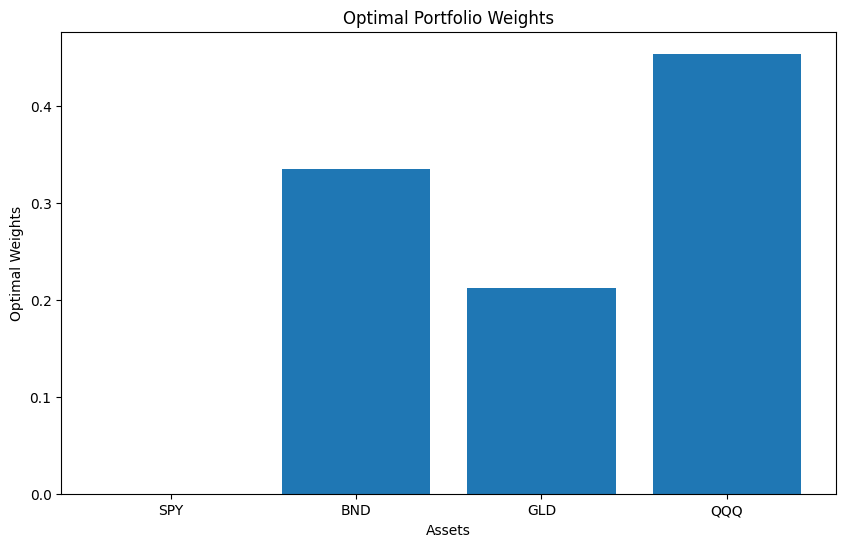

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, opt_results.x)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

## Summary: Portfolio Optimization with Python:

In this guide on Python for Finance, we transitioned from examining single stocks to addressing the more practical task of overseeing a collection of assets. Specifically, we delved into essential financial principles such as:

1. The Sharpe Ratio
2. Asset Allocation within a Portfolio
3. Optimizing a Portfolio

Furthermore, we explored the practical application of these concepts using Python.